<a href="https://colab.research.google.com/github/rjain-22/r_jain/blob/main/jain_rohan_hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

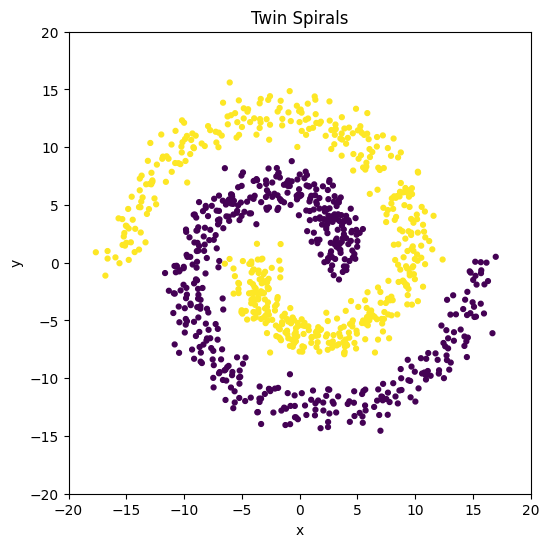

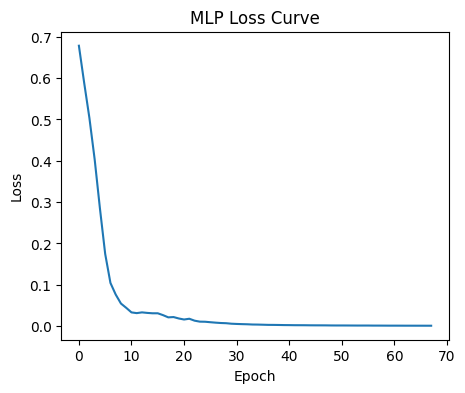

Test accuracy: 0.9967


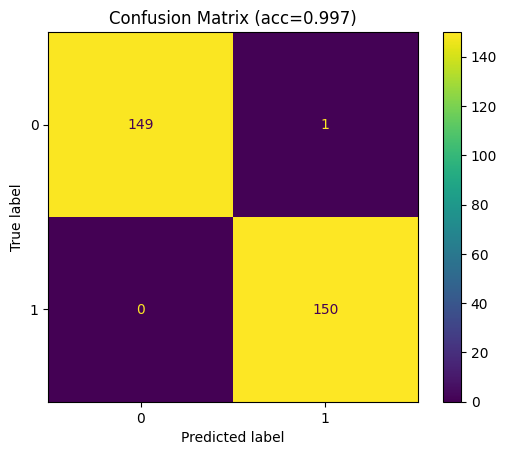

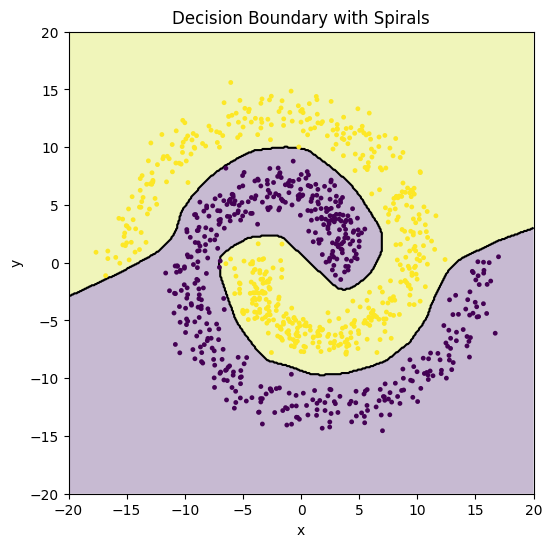

In [30]:
#Rohan Jain
# DSCI Fall 2025
# HW4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Question 1
def generate_spirals(n=1000, random_state=2023, noise_level=1):
    #1.1
    rng = np.random.default_rng(random_state)
    n_per = n // 2
    theta = np.linspace(0, 2*np.pi, n_per)

    # Spiral 1
    r1 = 2*theta + np.pi
    x1 = r1 * np.cos(theta) + rng.normal(scale=noise_level, size=n_per)
    y1 = r1 * np.sin(theta) + rng.normal(scale=noise_level, size=n_per)

    # Spiral 2
    r2 = 2*theta + np.pi
    x2 = r2 * np.cos(theta + np.pi) + rng.normal(scale=noise_level, size=n_per)
    y2 = r2 * np.sin(theta + np.pi) + rng.normal(scale=noise_level, size=n_per)

    X = np.vstack([np.c_[x1, y1], np.c_[x2, y2]])
    y = np.hstack([np.zeros(n_per, dtype=int), np.ones(n_per, dtype=int)])
    return X, y

def main():
    X, y = generate_spirals(n=1000)

    #1.2
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=12)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    plt.title("Twin Spirals")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    # 1.3
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, stratify=y, random_state=2023
    )

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s  = scaler.transform(X_test)

    # 1.4
    mlp = MLPClassifier(
        hidden_layer_sizes=(64, 64),
        activation='relu',
        learning_rate_init=0.02,
        alpha=1e-4,
        max_iter=600,
        random_state=2023,
    )
    mlp.fit(X_train_s, y_train)

    # 1.5
    plt.figure(figsize=(5, 4))
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epoch"); plt.ylabel("Loss")
    plt.title("MLP Loss Curve")
    plt.show()

    # 1.6
    y_pred = mlp.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {acc:.4f}")

    # 1.7
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format='d')
    plt.title(f"Confusion Matrix (acc={acc:.3f})")
    plt.show()

    # 1.8
    x_min, x_max = -20, 20
    y_min, y_max = -20, 20

    h = 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max + h, h),
        np.arange(y_min, y_max + h, h)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]

    grid_s = scaler.transform(grid)

    Z = mlp.predict(grid_s).reshape(xx.shape)

    plt.figure(figsize=(6,6))

    plt.contourf(xx, yy, Z, alpha=0.3, antialiased=True)

    plt.contour(xx, yy, Z, levels=[0.5], colors="k", linewidths=1.5)

    plt.scatter(X[:,0], X[:,1], c=y, s=12, edgecolors="none", zorder=3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Decision Boundary with Spirals")
    plt.show()

if __name__ == "__main__":
    main()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691


=== Final Results ===
Sigmoid  -> Train acc: 0.869, Test acc: 0.869, Test loss: 0.284
ReLU     -> Train acc: 0.970, Test acc: 0.965, Test loss: 0.097


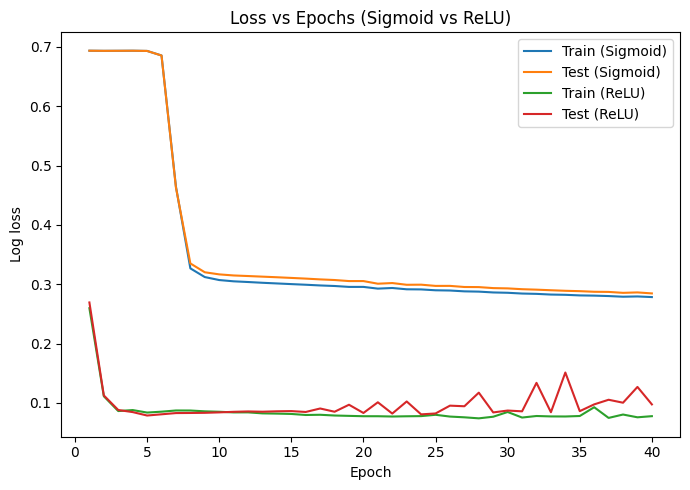

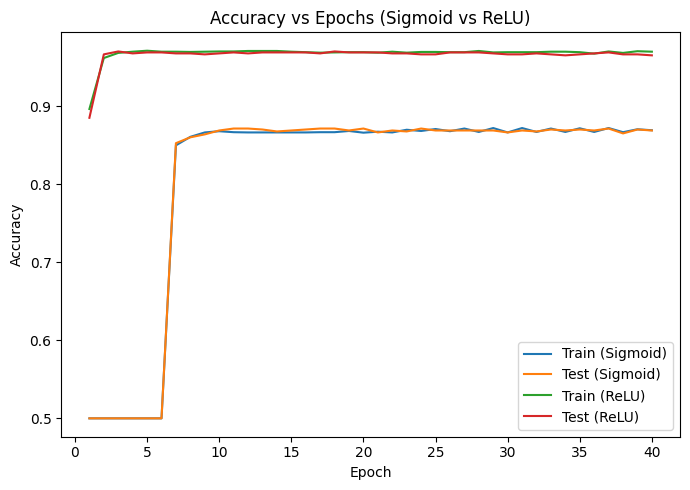

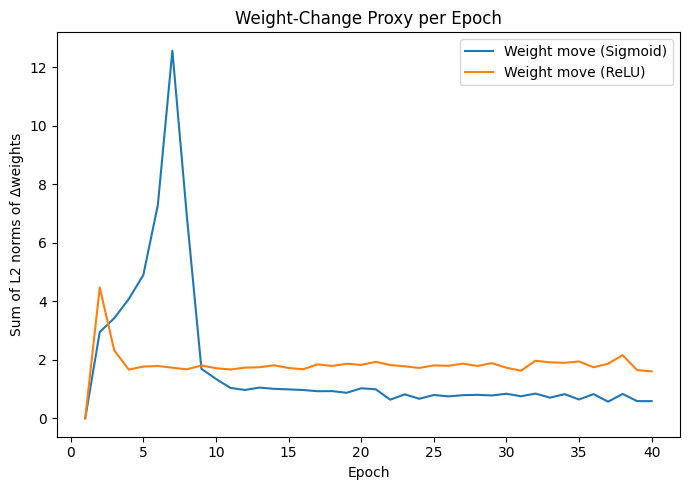

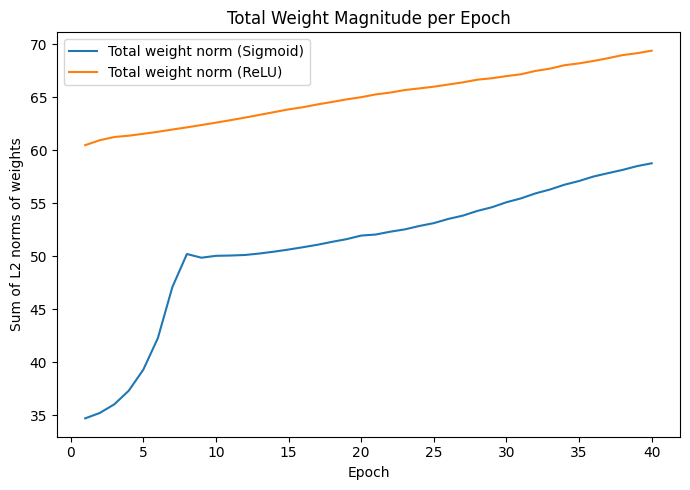

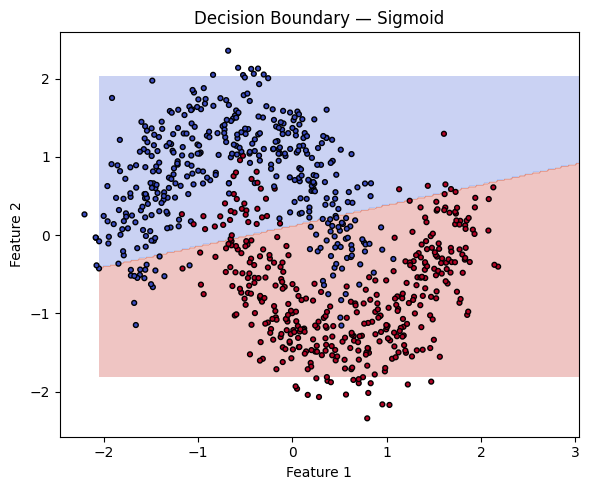

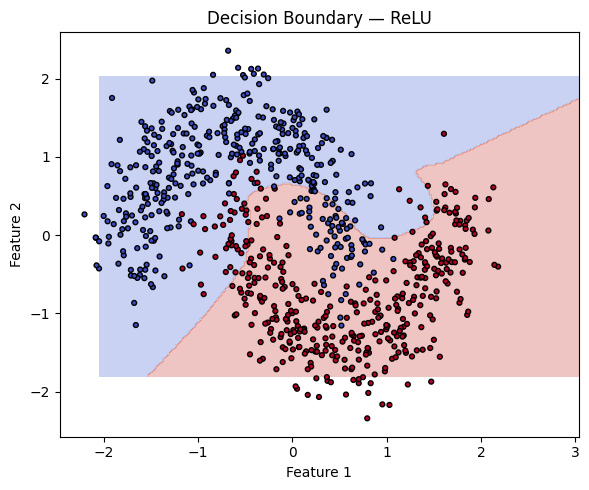


Saved figures:
 - q2_data.png
 - q2_loss.png
 - q2_accuracy.png
 - q2_weightmove.png
 - q2_weightnorms.png
 - q2_db_sigmoid.png
 - q2_db_relu.png


In [36]:
# Rohan Jain
# DSCI Fall 2025
# HW 4
# Q2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score

# -------------------------
# 1) Data
# -------------------------
X, y = make_moons(n_samples=4000, noise=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# -------------------------
# 0) Plot the raw data (before training)
# -------------------------
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=12)
plt.title("make_moons dataset (n=4000, noise=0.20)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.savefig("prob4_simple_data.png", dpi=150)
plt.close()


# -------------------------
# 2) Two deep MLPs: logistic vs ReLU
#    (same depth/width, same optimizer & LR)
# -------------------------
hidden = (128, 128, 128, 128, 128, 128)  # 6 hidden layers
lr = 1e-3
epochs = 40
batch_size = 128

def make_mlp(activation):
    return MLPClassifier(
        hidden_layer_sizes=hidden,
        activation=activation,         # "logistic" (sigmoid) or "relu"
        solver="adam",
        alpha=0.0,
        batch_size=batch_size,
        learning_rate_init=lr,
        max_iter=1,                   # do 1 epoch per .fit call
        shuffle=True,
        random_state=123,
        warm_start=True,              #warm_start=True lets us fit for 1 epoch repeatedly
        verbose=False
    )

mlp_sig = make_mlp("logistic")
mlp_relu = make_mlp("relu")
# IMPORTANT: make_mlp implicitly initializes the weights already by drawing them from a uniform
# distribution that's dependent on the network architecture (called Glorot/Xavier initialization)

# -------------------------
# 3) Training loop
#    - Call .fit() for one epoch at a time
#    - Track: loss (log loss), accuracy, and weight-change norm per epoch
# -------------------------
def train_over_epochs(model, X_tr, y_tr, X_te, y_te, epochs):
    losses_tr, losses_te = [], []
    accs_tr, accs_te = [], []
    weight_change_norms = []
    weight_norms = []          # track total weight magnitude per epoch

    prev_coefs = None

    for ep in range(epochs):
        model.fit(X_tr, y_tr)  # 1 iteration because max_iter=1 and warm_start=True

        # Predictions
        proba_tr = model.predict_proba(X_tr)
        proba_te = model.predict_proba(X_te)
        yhat_tr  = np.argmax(proba_tr, axis=1)
        yhat_te  = np.argmax(proba_te, axis=1)

        # Metrics
        from sklearn.metrics import log_loss, accuracy_score
        losses_tr.append(log_loss(y_tr, proba_tr))
        losses_te.append(log_loss(y_te, proba_te))
        accs_tr.append(accuracy_score(y_tr, yhat_tr))
        accs_te.append(accuracy_score(y_te, yhat_te))

        # Weight-move proxy (sum of L2 norms of ΔW for all layers this epoch)
        if prev_coefs is None:
            weight_change_norms.append(0.0)  # first epoch baseline
        else:
            total = 0.0
            for W_prev, W_now in zip(prev_coefs, model.coefs_):
                diff = W_now - W_prev
                # linalg package gives computations like 'norm', or absolute value:
                total += np.linalg.norm(diff)
            weight_change_norms.append(total)

        # Total weight magnitude this epoch
        total_W_norm = sum(np.linalg.norm(W) for W in model.coefs_)
        weight_norms.append(total_W_norm)

        # store copy to compare with next epoch
        prev_coefs = [W.copy() for W in model.coefs_]

    return {
        "loss_tr": losses_tr,
        "loss_te": losses_te,
        "acc_tr": accs_tr,
        "acc_te": accs_te,
        "w_move": weight_change_norms,
        "w_norms": weight_norms,
        "model": model
    }


hist_sig  = train_over_epochs(mlp_sig,  X_train, y_train, X_test, y_test, epochs)
hist_relu = train_over_epochs(mlp_relu, X_train, y_train, X_test, y_test, epochs)

# -------------------------
# 4) Print final results
# -------------------------
print("\n=== Final Results ===")
print(f"Sigmoid  -> Train acc: {hist_sig['acc_tr'][-1]:.3f}, Test acc: {hist_sig['acc_te'][-1]:.3f}, Test loss: {hist_sig['loss_te'][-1]:.3f}")
print(f"ReLU     -> Train acc: {hist_relu['acc_tr'][-1]:.3f}, Test acc: {hist_relu['acc_te'][-1]:.3f}, Test loss: {hist_relu['loss_te'][-1]:.3f}")

# -------------------------
# 5) Plots (loss, accuracy, weight move)
# -------------------------
epochs_axis = np.arange(1, epochs + 1)

# Loss curves
plt.figure(figsize=(7,5))
plt.plot(epochs_axis, hist_sig["loss_tr"], label="Train (Sigmoid)")
plt.plot(epochs_axis, hist_sig["loss_te"], label="Test (Sigmoid)")
plt.plot(epochs_axis, hist_relu["loss_tr"], label="Train (ReLU)")
plt.plot(epochs_axis, hist_relu["loss_te"], label="Test (ReLU)")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.title("Loss vs Epochs (Sigmoid vs ReLU)")
plt.legend()
plt.tight_layout()
plt.savefig("prob4_simple_loss.png", dpi=150)
plt.show()

# Accuracy curves
plt.figure(figsize=(7,5))
plt.plot(epochs_axis, hist_sig["acc_tr"], label="Train (Sigmoid)")
plt.plot(epochs_axis, hist_sig["acc_te"], label="Test (Sigmoid)")
plt.plot(epochs_axis, hist_relu["acc_tr"], label="Train (ReLU)")
plt.plot(epochs_axis, hist_relu["acc_te"], label="Test (ReLU)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs (Sigmoid vs ReLU)")
plt.legend()
plt.tight_layout()
plt.savefig("prob4_simple_accuracy.png", dpi=150)
plt.show()

# Weight-change proxy (how much weights moved each epoch)
plt.figure(figsize=(7,5))
plt.plot(epochs_axis, hist_sig["w_move"], label="Weight move (Sigmoid)")
plt.plot(epochs_axis, hist_relu["w_move"], label="Weight move (ReLU)")
plt.xlabel("Epoch")
plt.ylabel("Sum of L2 norms of Δweights")
plt.title("Weight-Change Proxy per Epoch")
plt.legend()
plt.tight_layout()
plt.savefig("prob4_simple_weightmove.png", dpi=150)
plt.show()

# Total weight magnitude per epoch (good for spotting explosion)
plt.figure(figsize=(7,5))
plt.plot(epochs_axis, hist_sig["w_norms"], label="Total weight norm (Sigmoid)")
plt.plot(epochs_axis, hist_relu["w_norms"], label="Total weight norm (ReLU)")
plt.xlabel("Epoch"); plt.ylabel("Sum of L2 norms of weights")
plt.title("Total Weight Magnitude per Epoch")
plt.legend()
plt.tight_layout()
plt.savefig("prob4_simple_weightnorms.png", dpi=150)
plt.show()

# -------------------------
# 6) Decision boundaries (final models)
# -------------------------
def decision_boundary_plot(model, title, fname):
    # grid in original feature space (then scale)
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_s = scaler.transform(grid)

    Z = model.predict(grid_s).reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.30, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=12, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
    plt.tight_layout(); plt.savefig(fname, dpi=150); plt.show()

decision_boundary_plot(hist_sig["model"],  "Decision Boundary — Sigmoid", "q2_db_sigmoid.png")
decision_boundary_plot(hist_relu["model"], "Decision Boundary — ReLU",    "q2_db_relu.png")

print("\nSaved figures:")
print(" - q2_data.png")
print(" - q2_loss.png")
print(" - q2_accuracy.png")
print(" - q2_weightmove.png")
print(" - q2_weightnorms.png")
print(" - q2_db_sigmoid.png")
print(" - q2_db_relu.png")

